In [2]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing  import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [4]:
img=image.load_img('/content/drive/MyDrive/Seed_Database/Training_data/calabash_premium/Lauki_premium_1.jpg')

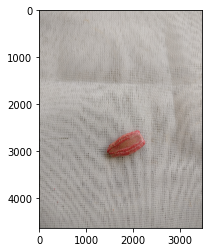

In [5]:
plt.imshow(img)

In [6]:
img.size

(3480, 4640)

In [7]:
cv2.imread('/content/drive/MyDrive/Seed_Database/Training_data/calabash_premium/Lauki_premium_1.jpg').shape

(4640, 3480, 3)

In [8]:
train = ImageDataGenerator(rescale = 1./255, 
                          #  rotation_range = 40,
                          #  width_shift_range = 0.2,
                          #  height_shift_range = 0.2,
                          #  shear_range = 0.2,
                          #  zoom_range = 0.2,
                          #  horizontal_flip = True,
                          #  fill_mode = 'nearest'
                           )
validation = ImageDataGenerator(rescale = 1./255)

In [9]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/Seed_Database/Training_data',
                                          target_size = (200,200),
                                          batch_size = 2
                                          )

validation_dataset = train.flow_from_directory('/content/drive/MyDrive/Seed_Database/Validation_data',
                                               target_size = (200,200),
                                               batch_size = 2
                                               )
validation_data = validation_dataset

Found 198 images belonging to 9 classes.
Found 36 images belonging to 9 classes.


In [10]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Flatten(),
                                    #
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    #
                                    tf.keras.layers.Dense(9,activation='softmax')]
                                   )

In [12]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr=1e-4),
              metrics = ['acc']
              )

In [13]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 30,
                      epochs = 100,
                      validation_data = validation_dataset 
                      )

Epoch 1/100
30/30 [==============================] - 159s 4s/step - loss: 2.4549 - acc: 0.0684 - val_loss: 2.2060 - val_acc: 0.1111
Epoch 2/100
30/30 [==============================] - 60s 2s/step - loss: 2.1819 - acc: 0.1308 - val_loss: 2.1961 - val_acc: 0.1111
Epoch 3/100
30/30 [==============================] - 48s 2s/step - loss: 2.1903 - acc: 0.2447 - val_loss: 2.1901 - val_acc: 0.2222
Epoch 4/100
30/30 [==============================] - 37s 1s/step - loss: 2.2049 - acc: 0.1956 - val_loss: 2.1794 - val_acc: 0.1111
Epoch 5/100
30/30 [==============================] - 32s 974ms/step - loss: 2.1933 - acc: 0.1440 - val_loss: 2.1524 - val_acc: 0.1111
Epoch 6/100
30/30 [==============================] - 28s 943ms/step - loss: 2.1579 - acc: 0.2144 - val_loss: 2.0636 - val_acc: 0.1944
Epoch 7/100
30/30 [==============================] - 26s 881ms/step - loss: 2.1306 - acc: 0.1162 - val_loss: 2.0166 - val_acc: 0.1389
Epoch 8/100
30/30 [==============================] - 26s 871ms/step - los

In [15]:
validation_dataset.class_indices

{'bitterGourd_premium': 0,
 'bitterGourd_regular': 1,
 'bitterGourd_standard': 2,
 'brinjal_premium': 3,
 'brinjal_regular': 4,
 'brinjal_standard': 5,
 'calabash_premium': 6,
 'calabash_regular': 7,
 'calabash_standard': 8}

<DirEntry 'calabash_premium'>
/content/drive/MyDrive/Seed_Database/Testing_data/calabash_premium


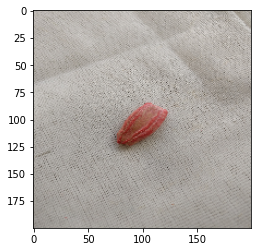

[[0. 0. 0. 0. 0. 0. 1. 0. 0.]]
6
This seed belongs to Calabash Class
This seed is of Premium Quality


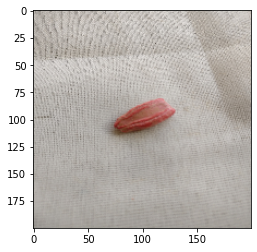

[[1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 5.159716e-13 0.000000e+00 0.000000e+00]]
0
This seed belongs to BitterGourd Class
This seed is of Premium Quality


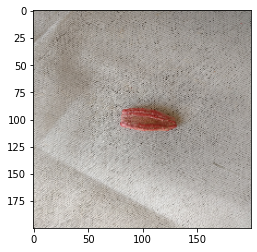

[[0. 0. 0. 0. 0. 0. 1. 0. 0.]]
6
This seed belongs to Calabash Class
This seed is of Premium Quality


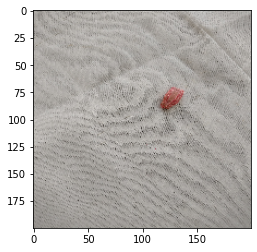

[[0. 1. 0. 0. 0. 0. 0. 0. 0.]]
1
This seed belongs to BitterGourd Class
This seed is of Regular Quality


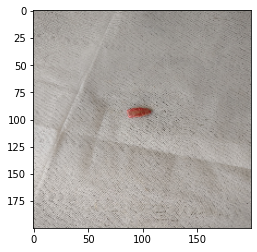

[[0. 0. 0. 0. 0. 0. 0. 1. 0.]]
7
This seed belongs to Calabash Class
This seed is of Regular Quality


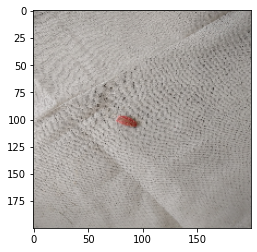

[[0. 1. 0. 0. 0. 0. 0. 0. 0.]]
1
This seed belongs to BitterGourd Class
This seed is of Regular Quality
<DirEntry 'calabash_regular'>
/content/drive/MyDrive/Seed_Database/Testing_data/calabash_regular


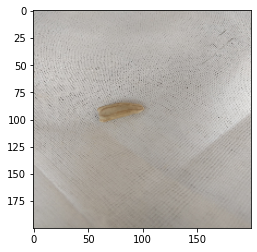

[[0. 0. 0. 0. 0. 0. 0. 1. 0.]]
7
This seed belongs to Calabash Class
This seed is of Regular Quality


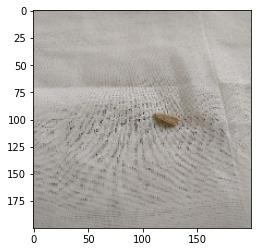

[[0. 0. 0. 0. 0. 0. 0. 1. 0.]]
7
This seed belongs to Calabash Class
This seed is of Regular Quality


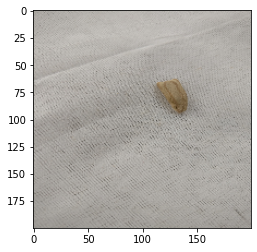

[[0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 2.775048e-30 0.000000e+00]]
1
This seed belongs to BitterGourd Class
This seed is of Regular Quality


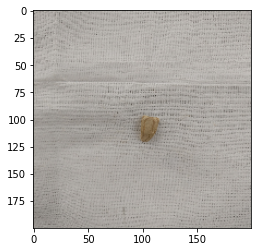

[[0. 0. 0. 0. 0. 0. 0. 1. 0.]]
7
This seed belongs to Calabash Class
This seed is of Regular Quality


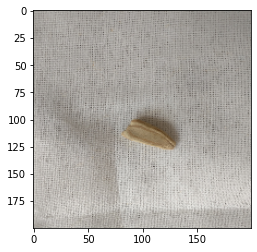

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 4.9736055e-15 1.0000000e+00]]
8
This seed belongs to Calabash Class
This seed is of Standard Quality


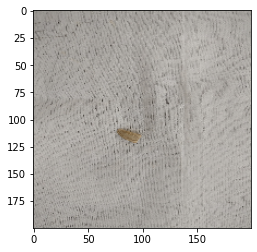

[[0. 0. 0. 0. 0. 0. 0. 1. 0.]]
7
This seed belongs to Calabash Class
This seed is of Regular Quality
<DirEntry 'calabash_standard'>
/content/drive/MyDrive/Seed_Database/Testing_data/calabash_standard


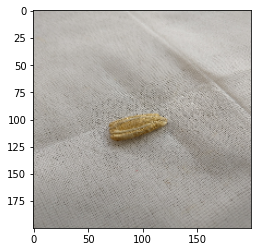

[[0. 0. 1. 0. 0. 0. 0. 0. 0.]]
2
This seed belongs to BitterGourd Class
This seed is of Standard Quality


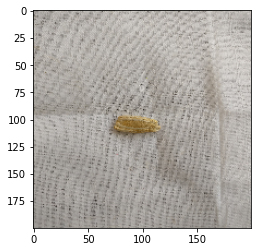

[[0. 0. 1. 0. 0. 0. 0. 0. 0.]]
2
This seed belongs to BitterGourd Class
This seed is of Standard Quality


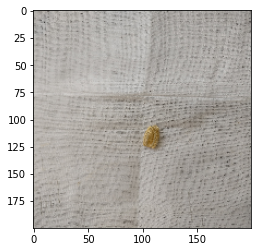

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]]
0
This seed belongs to BitterGourd Class
This seed is of Premium Quality


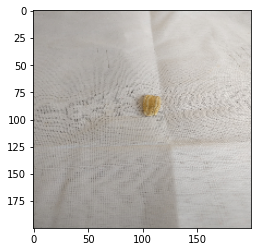

[[0. 0. 0. 0. 0. 0. 0. 1. 0.]]
7
This seed belongs to Calabash Class
This seed is of Regular Quality


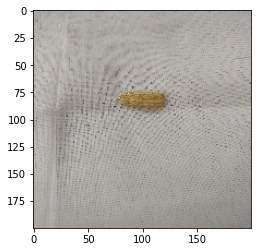

[[0. 1. 0. 0. 0. 0. 0. 0. 0.]]
1
This seed belongs to BitterGourd Class
This seed is of Regular Quality


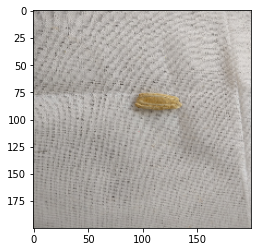

[[0. 1. 0. 0. 0. 0. 0. 0. 0.]]
1
This seed belongs to BitterGourd Class
This seed is of Regular Quality
<DirEntry 'bitterGourd_standard'>
/content/drive/MyDrive/Seed_Database/Testing_data/bitterGourd_standard


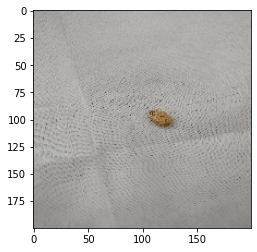

[[0. 0. 0. 0. 0. 0. 0. 1. 0.]]
7
This seed belongs to Calabash Class
This seed is of Regular Quality


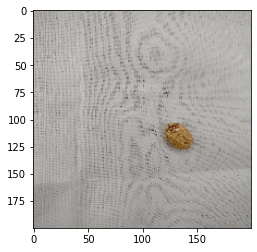

[[0. 0. 0. 0. 0. 0. 0. 1. 0.]]
7
This seed belongs to Calabash Class
This seed is of Regular Quality


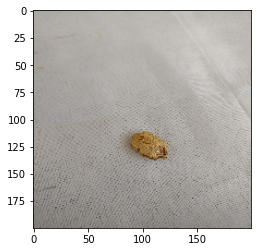

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]]
0
This seed belongs to BitterGourd Class
This seed is of Premium Quality


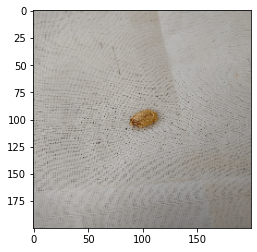

[[0. 0. 1. 0. 0. 0. 0. 0. 0.]]
2
This seed belongs to BitterGourd Class
This seed is of Standard Quality


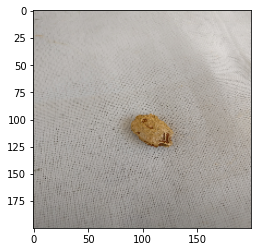

[[0. 0. 1. 0. 0. 0. 0. 0. 0.]]
2
This seed belongs to BitterGourd Class
This seed is of Standard Quality


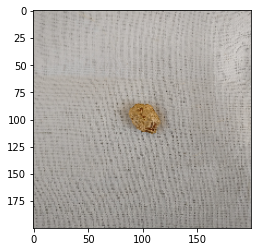

[[0. 0. 1. 0. 0. 0. 0. 0. 0.]]
2
This seed belongs to BitterGourd Class
This seed is of Standard Quality
<DirEntry 'brinjal_standard'>
/content/drive/MyDrive/Seed_Database/Testing_data/brinjal_standard


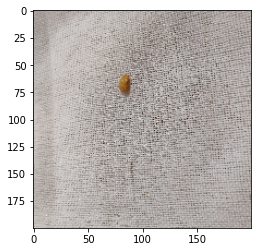

[[0. 0. 0. 0. 0. 1. 0. 0. 0.]]
5
This seed belongs to Brinjal Class
This seed is of Standard Quality


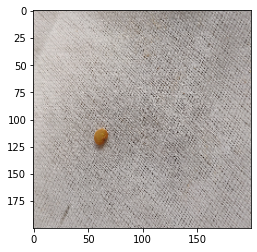

[[0. 0. 0. 0. 0. 1. 0. 0. 0.]]
5
This seed belongs to Brinjal Class
This seed is of Standard Quality


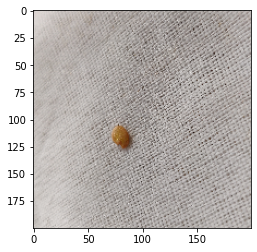

[[0. 0. 0. 0. 0. 1. 0. 0. 0.]]
5
This seed belongs to Brinjal Class
This seed is of Standard Quality


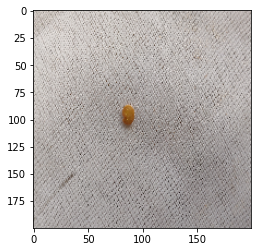

[[0. 0. 0. 1. 0. 0. 0. 0. 0.]]
3
This seed belongs to Brinjal Class
This seed is of Premium Quality


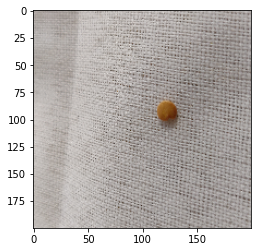

[[0. 0. 0. 0. 0. 1. 0. 0. 0.]]
5
This seed belongs to Brinjal Class
This seed is of Standard Quality


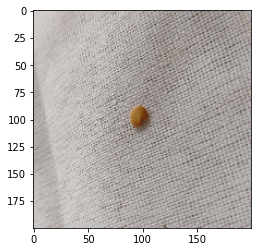

[[0. 0. 0. 0. 0. 1. 0. 0. 0.]]
5
This seed belongs to Brinjal Class
This seed is of Standard Quality
<DirEntry 'bitterGourd_premium'>
/content/drive/MyDrive/Seed_Database/Testing_data/bitterGourd_premium


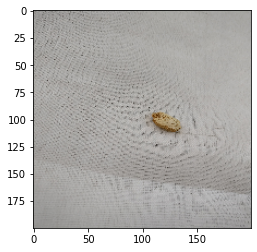

[[0. 0. 0. 0. 0. 0. 0. 1. 0.]]
7
This seed belongs to Calabash Class
This seed is of Regular Quality


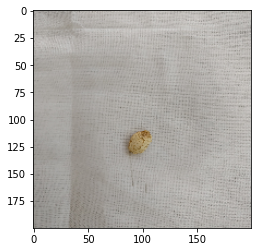

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]]
0
This seed belongs to BitterGourd Class
This seed is of Premium Quality


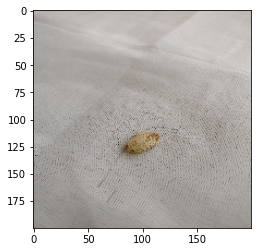

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]]
0
This seed belongs to BitterGourd Class
This seed is of Premium Quality


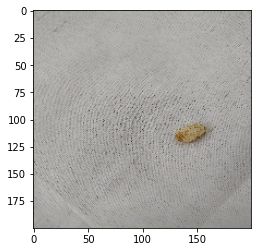

[[0. 0. 0. 0. 0. 0. 0. 1. 0.]]
7
This seed belongs to Calabash Class
This seed is of Regular Quality


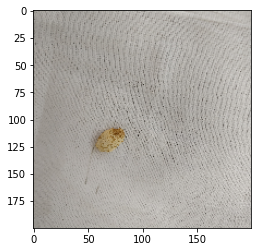

[[0. 0. 1. 0. 0. 0. 0. 0. 0.]]
2
This seed belongs to BitterGourd Class
This seed is of Standard Quality


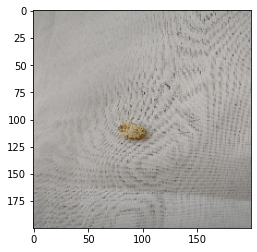

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]]
0
This seed belongs to BitterGourd Class
This seed is of Premium Quality
<DirEntry 'bitterGourd_regular'>
/content/drive/MyDrive/Seed_Database/Testing_data/bitterGourd_regular


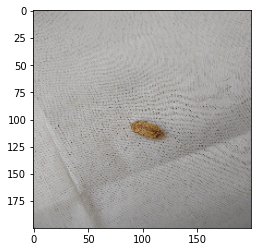

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]]
0
This seed belongs to BitterGourd Class
This seed is of Premium Quality


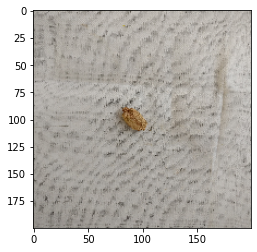

[[0. 0. 1. 0. 0. 0. 0. 0. 0.]]
2
This seed belongs to BitterGourd Class
This seed is of Standard Quality


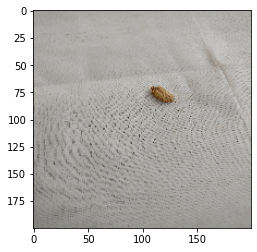

[[0. 1. 0. 0. 0. 0. 0. 0. 0.]]
1
This seed belongs to BitterGourd Class
This seed is of Regular Quality


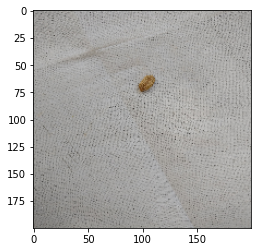

[[0. 0. 0. 0. 0. 0. 0. 1. 0.]]
7
This seed belongs to Calabash Class
This seed is of Regular Quality


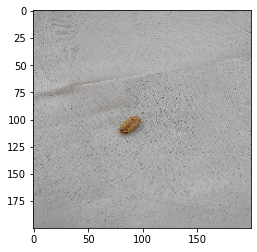

[[0. 1. 0. 0. 0. 0. 0. 0. 0.]]
1
This seed belongs to BitterGourd Class
This seed is of Regular Quality


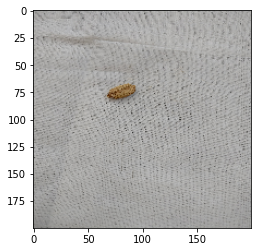

[[0. 1. 0. 0. 0. 0. 0. 0. 0.]]
1
This seed belongs to BitterGourd Class
This seed is of Regular Quality
<DirEntry 'brinjal_premium'>
/content/drive/MyDrive/Seed_Database/Testing_data/brinjal_premium


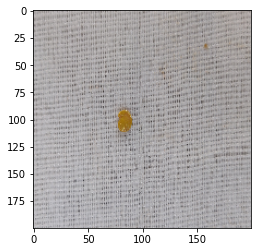

[[0. 1. 0. 0. 0. 0. 0. 0. 0.]]
1
This seed belongs to BitterGourd Class
This seed is of Regular Quality


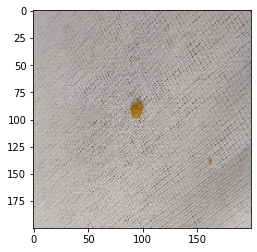

[[0. 0. 0. 1. 0. 0. 0. 0. 0.]]
3
This seed belongs to Brinjal Class
This seed is of Premium Quality


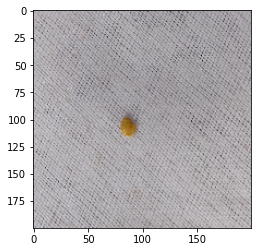

[[0. 0. 0. 1. 0. 0. 0. 0. 0.]]
3
This seed belongs to Brinjal Class
This seed is of Premium Quality


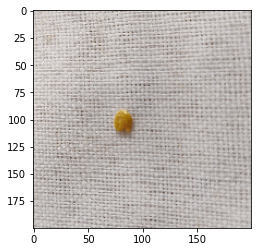

[[0. 0. 0. 1. 0. 0. 0. 0. 0.]]
3
This seed belongs to Brinjal Class
This seed is of Premium Quality


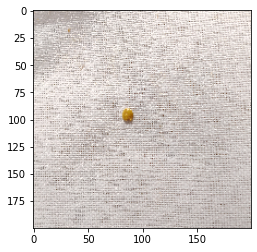

[[0. 0. 0. 1. 0. 0. 0. 0. 0.]]
3
This seed belongs to Brinjal Class
This seed is of Premium Quality


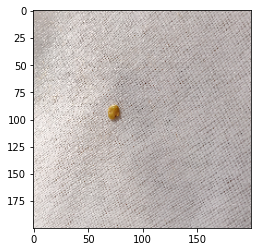

[[0. 0. 0. 1. 0. 0. 0. 0. 0.]]
3
This seed belongs to Brinjal Class
This seed is of Premium Quality
<DirEntry 'brinjal_regular'>
/content/drive/MyDrive/Seed_Database/Testing_data/brinjal_regular


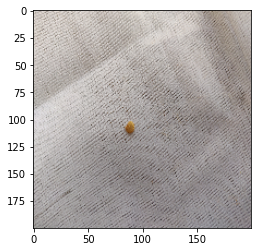

[[0. 0. 0. 1. 0. 0. 0. 0. 0.]]
3
This seed belongs to Brinjal Class
This seed is of Premium Quality


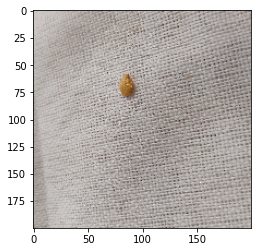

[[0. 0. 0. 0. 0. 1. 0. 0. 0.]]
5
This seed belongs to Brinjal Class
This seed is of Standard Quality


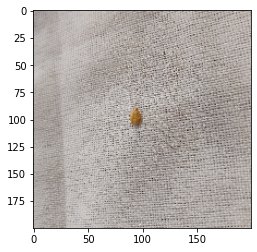

[[0. 0. 0. 0. 0. 1. 0. 0. 0.]]
5
This seed belongs to Brinjal Class
This seed is of Standard Quality


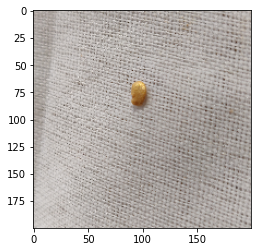

[[0. 0. 0. 1. 0. 0. 0. 0. 0.]]
3
This seed belongs to Brinjal Class
This seed is of Premium Quality


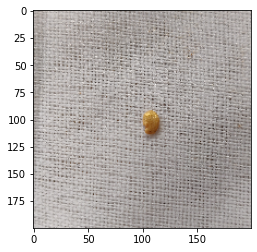

[[0. 0. 0. 0. 1. 0. 0. 0. 0.]]
4
This seed belongs to Brinjal Class
This seed is of Regular Quality


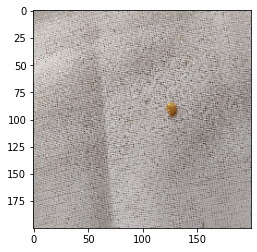

[[0. 0. 0. 1. 0. 0. 0. 0. 0.]]
3
This seed belongs to Brinjal Class
This seed is of Premium Quality


In [16]:
dir_path='/content/drive/MyDrive/Seed_Database/Testing_data'
for i in os.scandir(dir_path):
  print(i)
  x = os.path.join(dir_path, '/', i)
  print(x)
  for j in os.scandir(x):
    img=image.load_img(os.path.join(x, '/', j), target_size=(200,200))

    plt.imshow(img)
    plt.show()

    X= image.img_to_array(img)
    X= np.expand_dims(X,axis=0)
    images=np.vstack([X])
    val=model.predict(images)
    print(val)
    val = val.tolist()
    p = val[0].index(max(val[0]))
    print(p)
  
    if(p==0):
      print('This seed belongs to BitterGourd Class')
      print('This seed is of Premium Quality')
    elif(p==1):
      print('This seed belongs to BitterGourd Class')
      print('This seed is of Regular Quality')
    elif(p==2):
      print('This seed belongs to BitterGourd Class')
      print('This seed is of Standard Quality')
    elif(p==3):
      print('This seed belongs to Brinjal Class')
      print('This seed is of Premium Quality')
    elif(p==4):
      print('This seed belongs to Brinjal Class')
      print('This seed is of Regular Quality')
    elif(p==5):
      print('This seed belongs to Brinjal Class')
      print('This seed is of Standard Quality')
    elif(p==6):
      print('This seed belongs to Calabash Class')
      print('This seed is of Premium Quality')
    elif(p==7):
      print('This seed belongs to Calabash Class')
      print('This seed is of Regular Quality')
    elif(p==8):
      print('This seed belongs to Calabash Class')
      print('This seed is of Standard Quality')
